In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [54]:
# <-- IMPORTAÇÃO DOS DADOS
dados = pd.read_csv(r'C:\Cursos\Formacao_Data_Science\31.Prática em Python\dados\iris.csv')

In [55]:
# <-- SEPARAÇÃO DOS DADOS
previsores = dados.iloc[:, 0:4].values
classe = dados.iloc[:, 4].values

In [56]:
# <-- TRANSFORMAÇÃO DOS DADOS CATEGÓRICOS EM NUMÉRICOS
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)

In [57]:
# <-- PARÂMETROS PARA O K-MEDOIDS
cluster = kmedoids(previsores, [5, 20, 35])
cluster.get_medoids()

[5, 20, 35]

In [58]:
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
previsoes

[[100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  106,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49]]

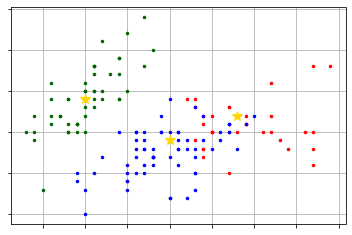

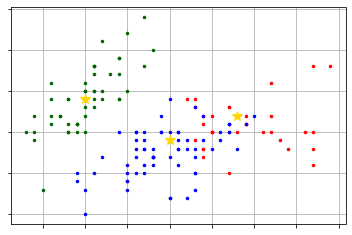

In [59]:
v = cluster_visualizer()
v.append_clusters(previsoes, previsores[:, 0:2])
v.append_cluster(medoides, data=previsores[:, 0:2], marker='*', markersize=10)
v.show()

In [62]:
# Código para criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos
# Utilizado posteriormente para visualização da matriz de contingência
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(classe[previsoes[i][j]])

In [63]:
# Geração da matriz de contingência, comparando os grupos reais com os grupos previstos
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [ 0, 50,  0],
       [35, 15,  0]], dtype=int64)